# Correlation of random processes
This notebook provides examples for generating correlated random variables as well as for analyzing random processes.

## Generation of correlated random variables

### Based on Cholesky Decomposition
The first example is based on the Cholesky decompostion of the correlation matrix.

For N = 10: PearsonRResult(statistic=-0.09763869940383958, pvalue=0.7884398945477127)
For N = 100: PearsonRResult(statistic=0.3707767104048985, pvalue=0.00014619982339597685)
For N = 1000: PearsonRResult(statistic=0.13839717590258435, pvalue=1.1221900835377716e-05)
For N = 10000: PearsonRResult(statistic=0.18854797387675987, pvalue=1.0937699351869608e-80)
For N = 100000: PearsonRResult(statistic=0.19991796144895724, pvalue=0.0)
For N = 1000000: PearsonRResult(statistic=0.19991400969972895, pvalue=0.0)


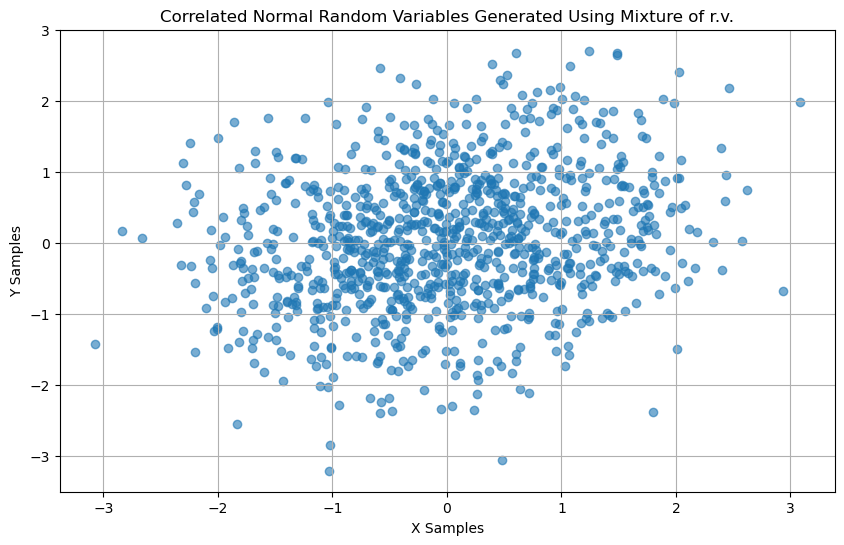

In [1]:
# Necessary modules
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform correlation for different number of random variables in order to show
# the efficiency of this approach
for exponent in np.arange(1, 7, 1):
    N = 10**exponent # number of r.v.
    rho = 0.2 # correlation coefficient
    x1 = stats.norm.rvs(size = N) 
    x2 = stats.norm.rvs(size = N)
    xcorr = rho*x1 + np.sqrt(1-rho*rho)*x2 # generate correlated r.v.
    print("For N = {}: {}".format(N, stats.pearsonr(x1, xcorr))) # output the actual correlation of generated r.v.

# Finally, a visualization of the correlation result
x1 = stats.norm.rvs(size = 1000)
x2 = stats.norm.rvs(size = 1000)
xcorr = rho*x1 + np.sqrt(1-rho*rho)*x2

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x1, xcorr, alpha=0.6)
plt.title('Correlated Normal Random Variables Generated Using Mixture of r.v.')
plt.xlabel('X Samples')
plt.ylabel('Y Samples')
plt.grid(True)
plt.savefig('Chapter4_Correlation_Mixture.png')
plt.show()

### Copula method
The second method is using an "auxilliary" distribution for which the correlation is given. Based on the marginal PDF of this distribution, correlated r.v. of any arbitrary PDF can be generated.

For N = 1000: PearsonRResult(statistic=0.812088676032248, pvalue=1.062932384127607e-235)


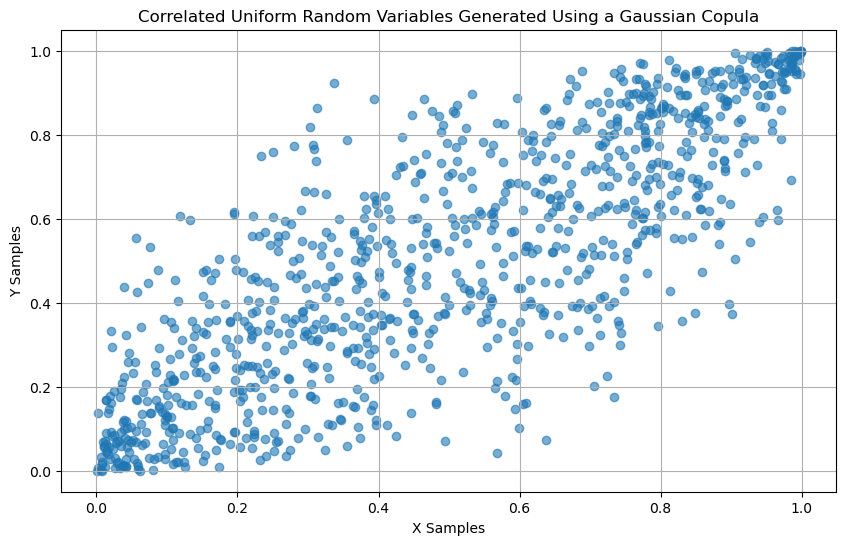

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
mu = 0  # Mean of the normal distributions
sigma = 1  # Standard deviation of the normal distributions
rho = 0.8  # Correlation coefficient

# Step 1: Generate samples from a multivariate normal distribution (the copula)
num_samples = 1000
mean = [mu, mu]
cov = [[sigma**2, rho*sigma*sigma], [rho*sigma*sigma, sigma**2]]  # Covariance matrix
mvn_samples = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=num_samples)

# Step 2: Transform samples to uniform distribution using the CDF of the normal distribution
u_samples = stats.norm.cdf(mvn_samples[:,0], loc=mu, scale=sigma)
v_samples = stats.norm.cdf(mvn_samples[:,1], loc=mu, scale=sigma)

# Step 3: Transform uniform samples to the desired marginal distributions
x_samples = stats.uniform.ppf(u_samples, loc=mu, scale=sigma)
y_samples = stats.uniform.ppf(v_samples, loc=mu, scale=sigma)
print("For N = {}: {}".format(num_samples, stats.pearsonr(x_samples, y_samples)))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_samples, alpha=0.6)
plt.title('Correlated Uniform Random Variables Generated Using a Gaussian Copula')
plt.xlabel('X Samples')
plt.ylabel('Y Samples')
plt.grid(True)
plt.show()


## Point estimates

### Measurements

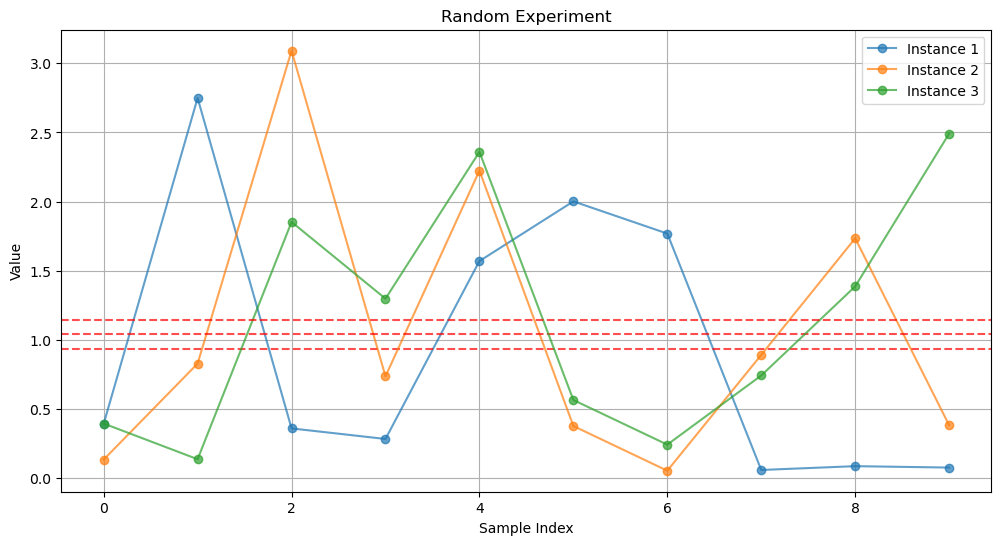

In [54]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, t, chi2

# Parameters for the synthetic data
sample_sizes = [10, 50, 100, 500, 1000]  # Varying lengths of individual experiments
num_experiments = 50000  # Same number of experiments for each case
scale = 1.0  # Scale parameter for the exponential distribution
true_mean = scale

# Function to generate synthetic data for each sample size
def generate_data(sample_sizes, num_experiments, scale):
    data = {n: np.random.exponential(scale=scale, size=(num_experiments, n)) for n in sample_sizes}
    return data

# Function to calculate sample means for different sample sizes
def calculate_means(data):
    sample_means = {n: np.mean(data[n], axis=1) for n in data.keys()}
    return sample_means


# Function to calculate sample variances for different sample sizes
def calculate_variances(data):
    sample_variances = {n: np.var(data[n], axis=1, ddof=1) for n in data.keys()}
    return sample_variances

# Generate synthetic data
data = generate_data(sample_sizes, num_experiments, scale)

# Calculate sample means
sample_means = calculate_means(data)

# Calculate sample variances
sample_variances = calculate_variances(data)

# Plot exemplary instances of the random experiment and their means
plt.figure(figsize=(12, 6))

num_instances = min(3, num_experiments)
for i in range(num_instances):
    plt.plot(data[10][i], 'o-', alpha=0.7, label=f'Instance {i+1}')
    plt.axhline(np.mean(data[10][i]), color='r', linestyle='--', alpha=0.7)

plt.title('Random Experiment')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('Chapter4_Statistics_Sample_Mean_1.png')
plt.show()



### Sample Mean

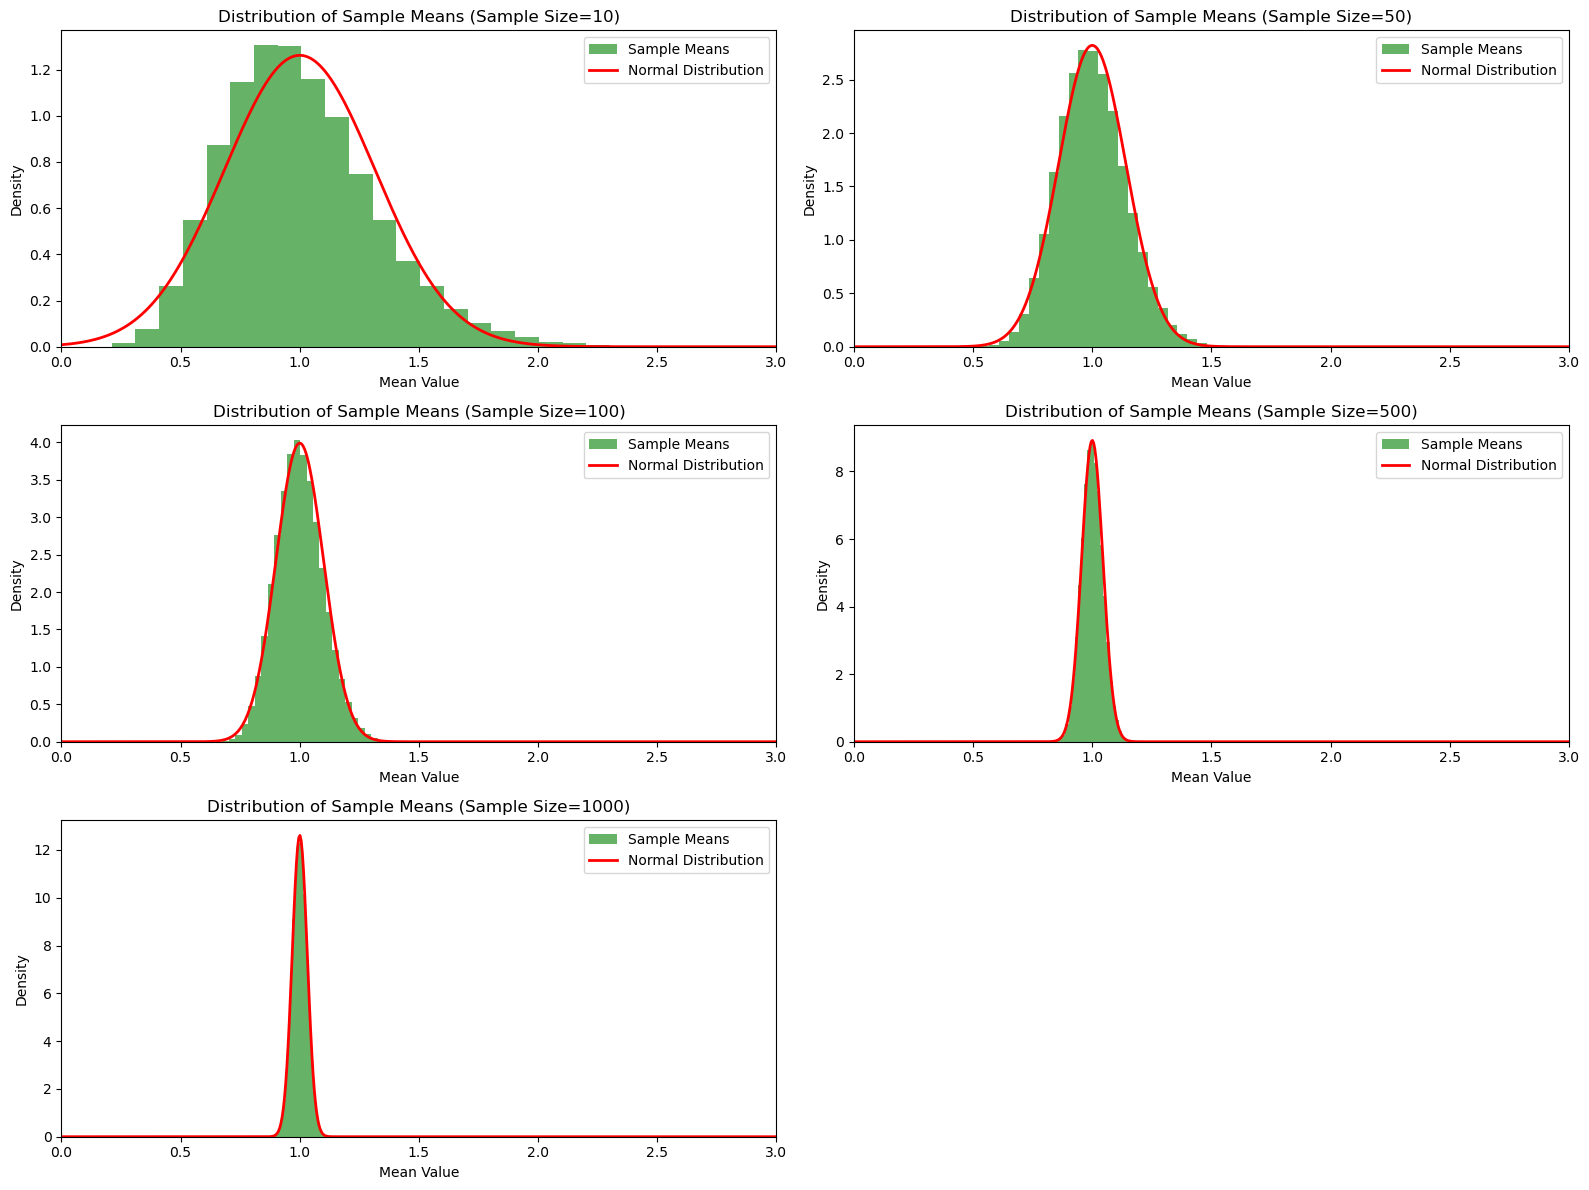

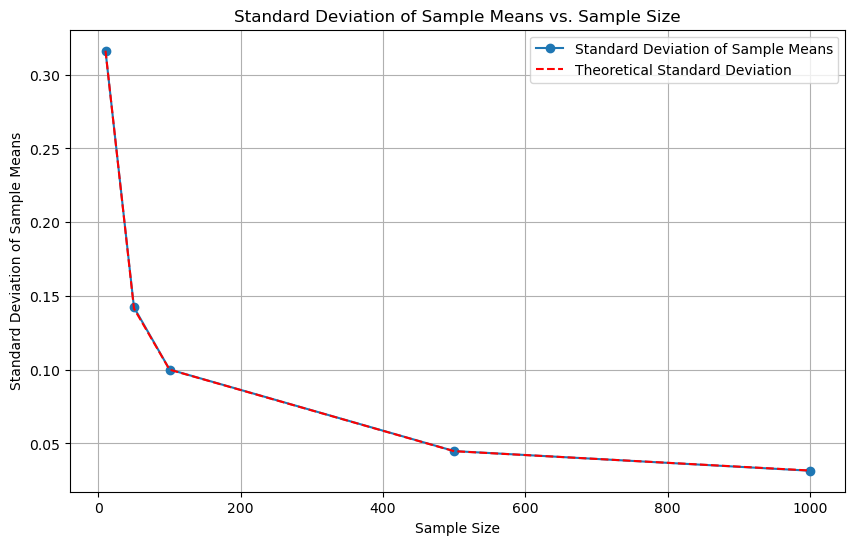

In [55]:
# Plot histograms of sample means
plt.figure(figsize=(16, 12))

x_range = np.linspace(0, 5, 1000)
for i, n in enumerate(sample_sizes):
    plt.subplot(3, 2, i + 1)
    means = sample_means[n]
    plt.hist(means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means')
    
    # Plot the normal distribution for comparison
    plt.plot(x_range, norm.pdf(x_range, loc=true_mean, scale=scale/np.sqrt(n)), 'r-', lw=2, label='Normal Distribution')
    
    plt.title(f'Distribution of Sample Means (Sample Size={n})')
    plt.xlabel('Mean Value')
    plt.ylabel('Density')
    plt.xlim([0, 3])
    plt.legend()

plt.tight_layout()
plt.savefig('Chapter4_Statistics_Sample_Mean_2.png')
plt.show()

# Plot standard deviation of sample means as a function of sample size
std_of_means = [np.std(sample_means[n]) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, std_of_means, 'o-', label='Standard Deviation of Sample Means')
plt.plot(sample_sizes, scale / np.sqrt(np.array(sample_sizes)), 'r--', label='Theoretical Standard Deviation')
plt.title('Standard Deviation of Sample Means vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation of Sample Means')
plt.legend()
plt.grid(True)
plt.savefig('Chapter4_Statistics_Sample_Mean_3.png')
plt.show()


### Student-t Test

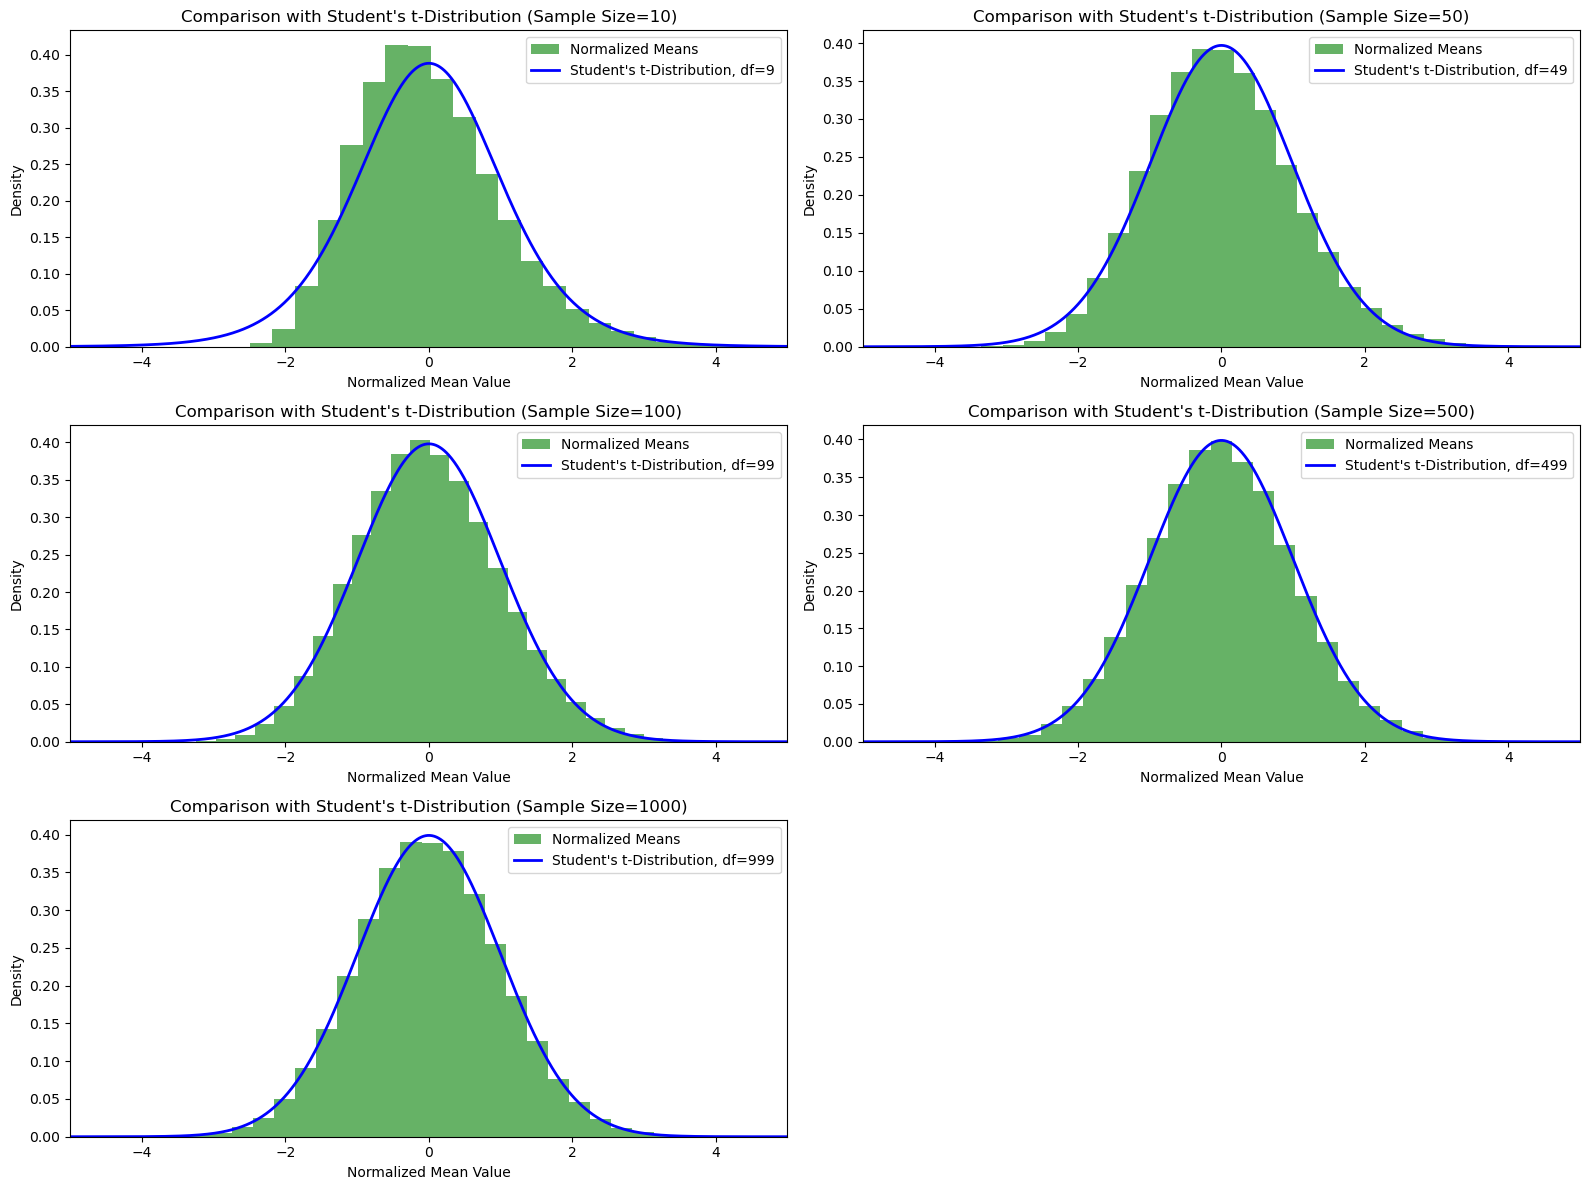

In [59]:
# Plot comparison of actual and theoretical Student's t-distribution
plt.figure(figsize=(16, 12))

for i, n in enumerate(sample_sizes):
    plt.subplot(3, 2, i + 1)
    means = sample_means[n]
    # Normalize the deviation of the means
    normalized_means = (means - true_mean) / (1.0 / np.sqrt(n))
    
    plt.hist(normalized_means, bins=30, density=True, alpha=0.6, color='g', label='Normalized Means')
    
    # Calculate the parameters for the t-distribution
    df = n - 1
    
    # Plot the t-distribution for comparison
    x_t = np.linspace(-5, 5, 1000)
    plt.plot(x_t, t.pdf(x_t, df=df), 'b-', lw=2, label=f"Student's t-Distribution, df={df}")
    
    plt.title(f'Comparison with Student\'s t-Distribution (Sample Size={n})')
    plt.xlabel('Normalized Mean Value')
    plt.ylabel('Density')
    plt.xlim([-5, 5])
    plt.legend()

plt.tight_layout()
plt.savefig('Chapter4_Statistics_Sample_Mean_4.png')
plt.show()

### Sample Variance

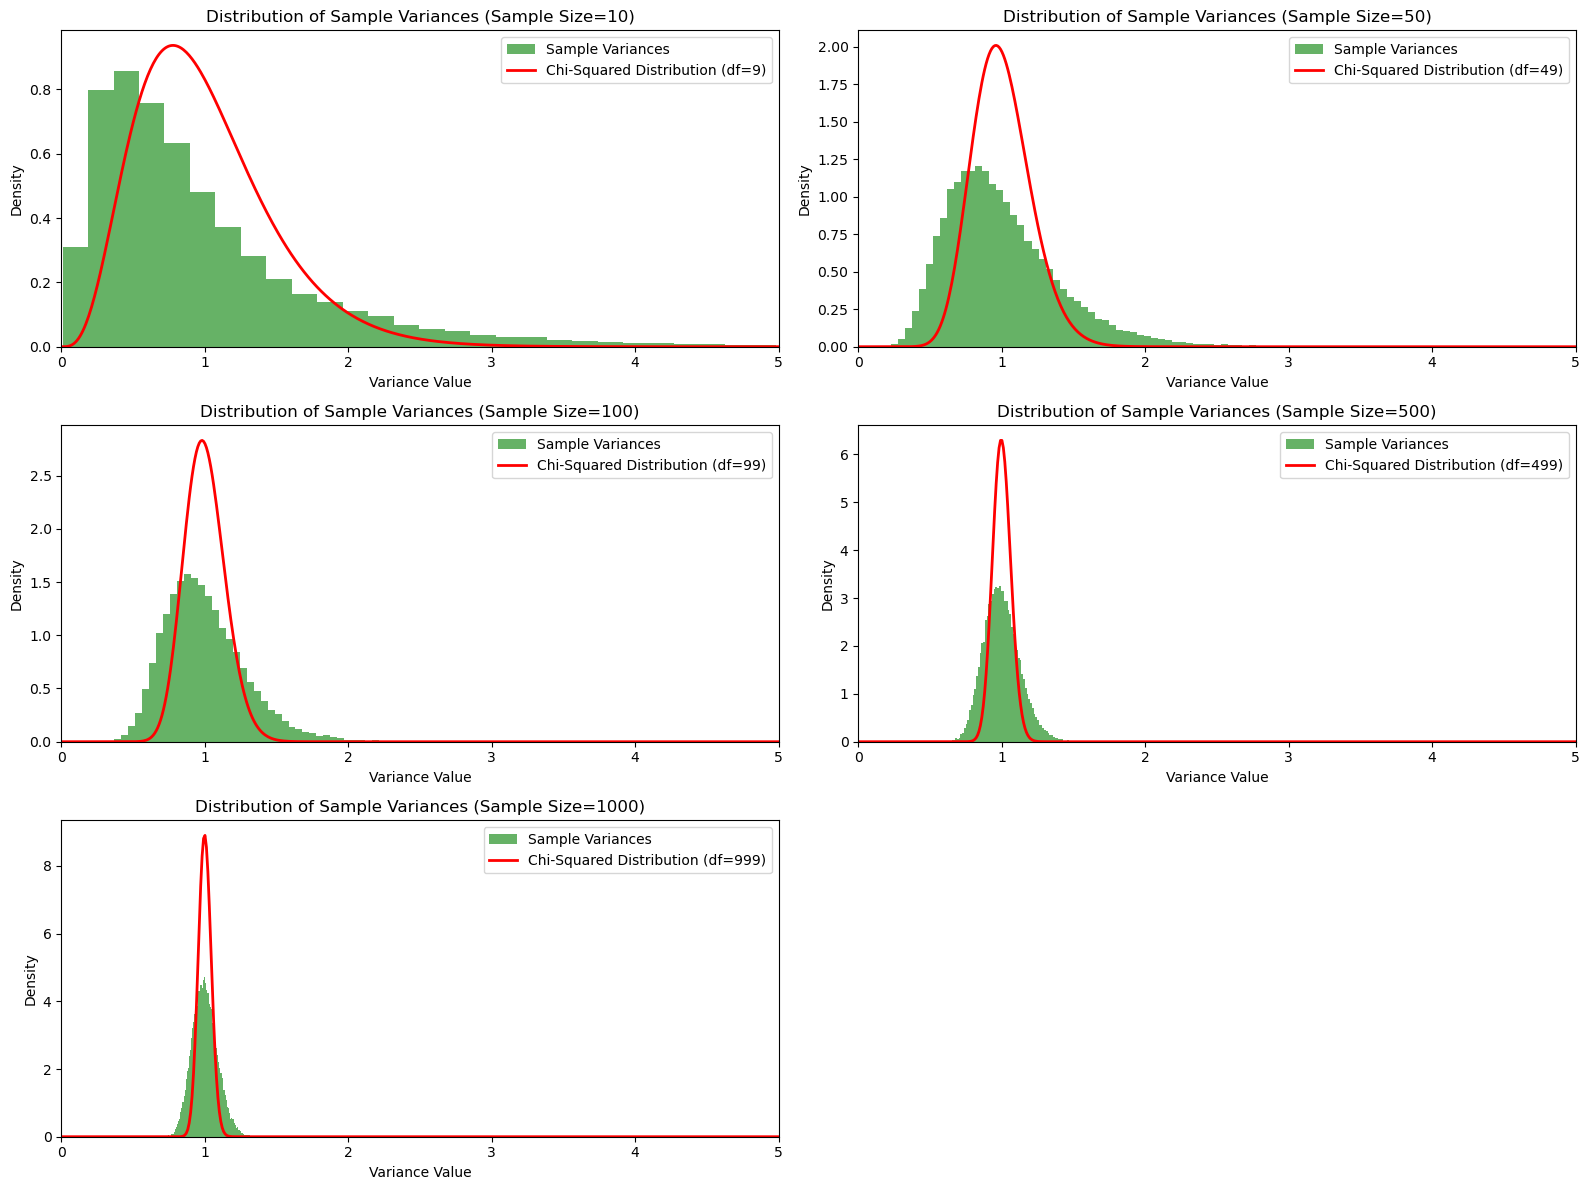

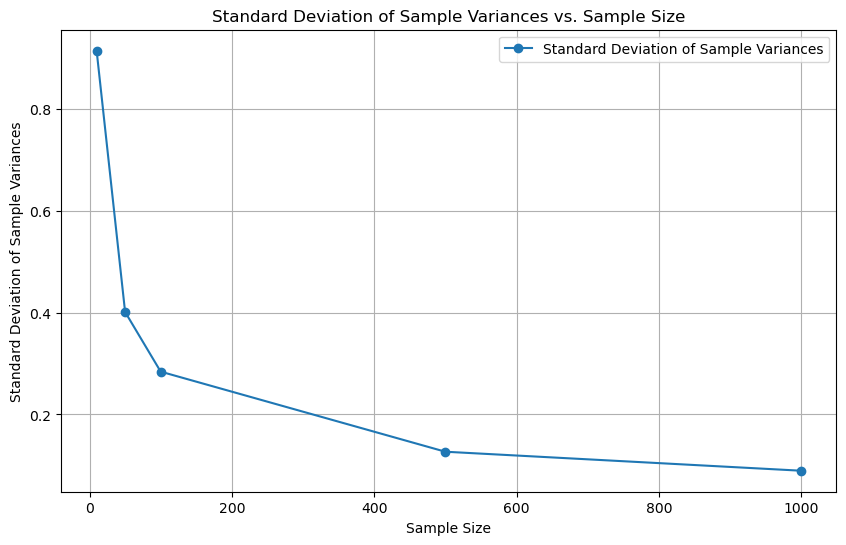

In [61]:
# Plot histograms of sample variances
plt.figure(figsize=(16, 12))

x_range = np.linspace(0, 10, 1000)
for i, n in enumerate(sample_sizes):
    plt.subplot(3, 2, i + 1)
    variances = sample_variances[n]
    plt.hist(variances, bins=100, density=True, alpha=0.6, color='g', label='Sample Variances')
    
    # Plot the chi-squared distribution for comparison
    df = n - 1
    plt.plot(x_range, chi2.pdf(x_range, df=df, scale=1/(df)), 'r-', lw=2, label=f'Chi-Squared Distribution (df={df})')
    
    plt.title(f'Distribution of Sample Variances (Sample Size={n})')
    plt.xlabel('Variance Value')
    plt.ylabel('Density')
    plt.xlim([0, 5])
    plt.legend()

plt.tight_layout()
plt.savefig('Chapter4_Statistics_Sample_Mean_4.png')
plt.show()

# Plot standard deviation of sample variances as a function of sample size
std_of_variances = [np.std(sample_variances[n]) for n in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, std_of_variances, 'o-', label='Standard Deviation of Sample Variances')
plt.title('Standard Deviation of Sample Variances vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation of Sample Variances')
plt.legend()
plt.grid(True)
plt.savefig('Chapter4_Statistics_Sample_Mean_5.png')
plt.show()

### Confidence intervals for sample mean

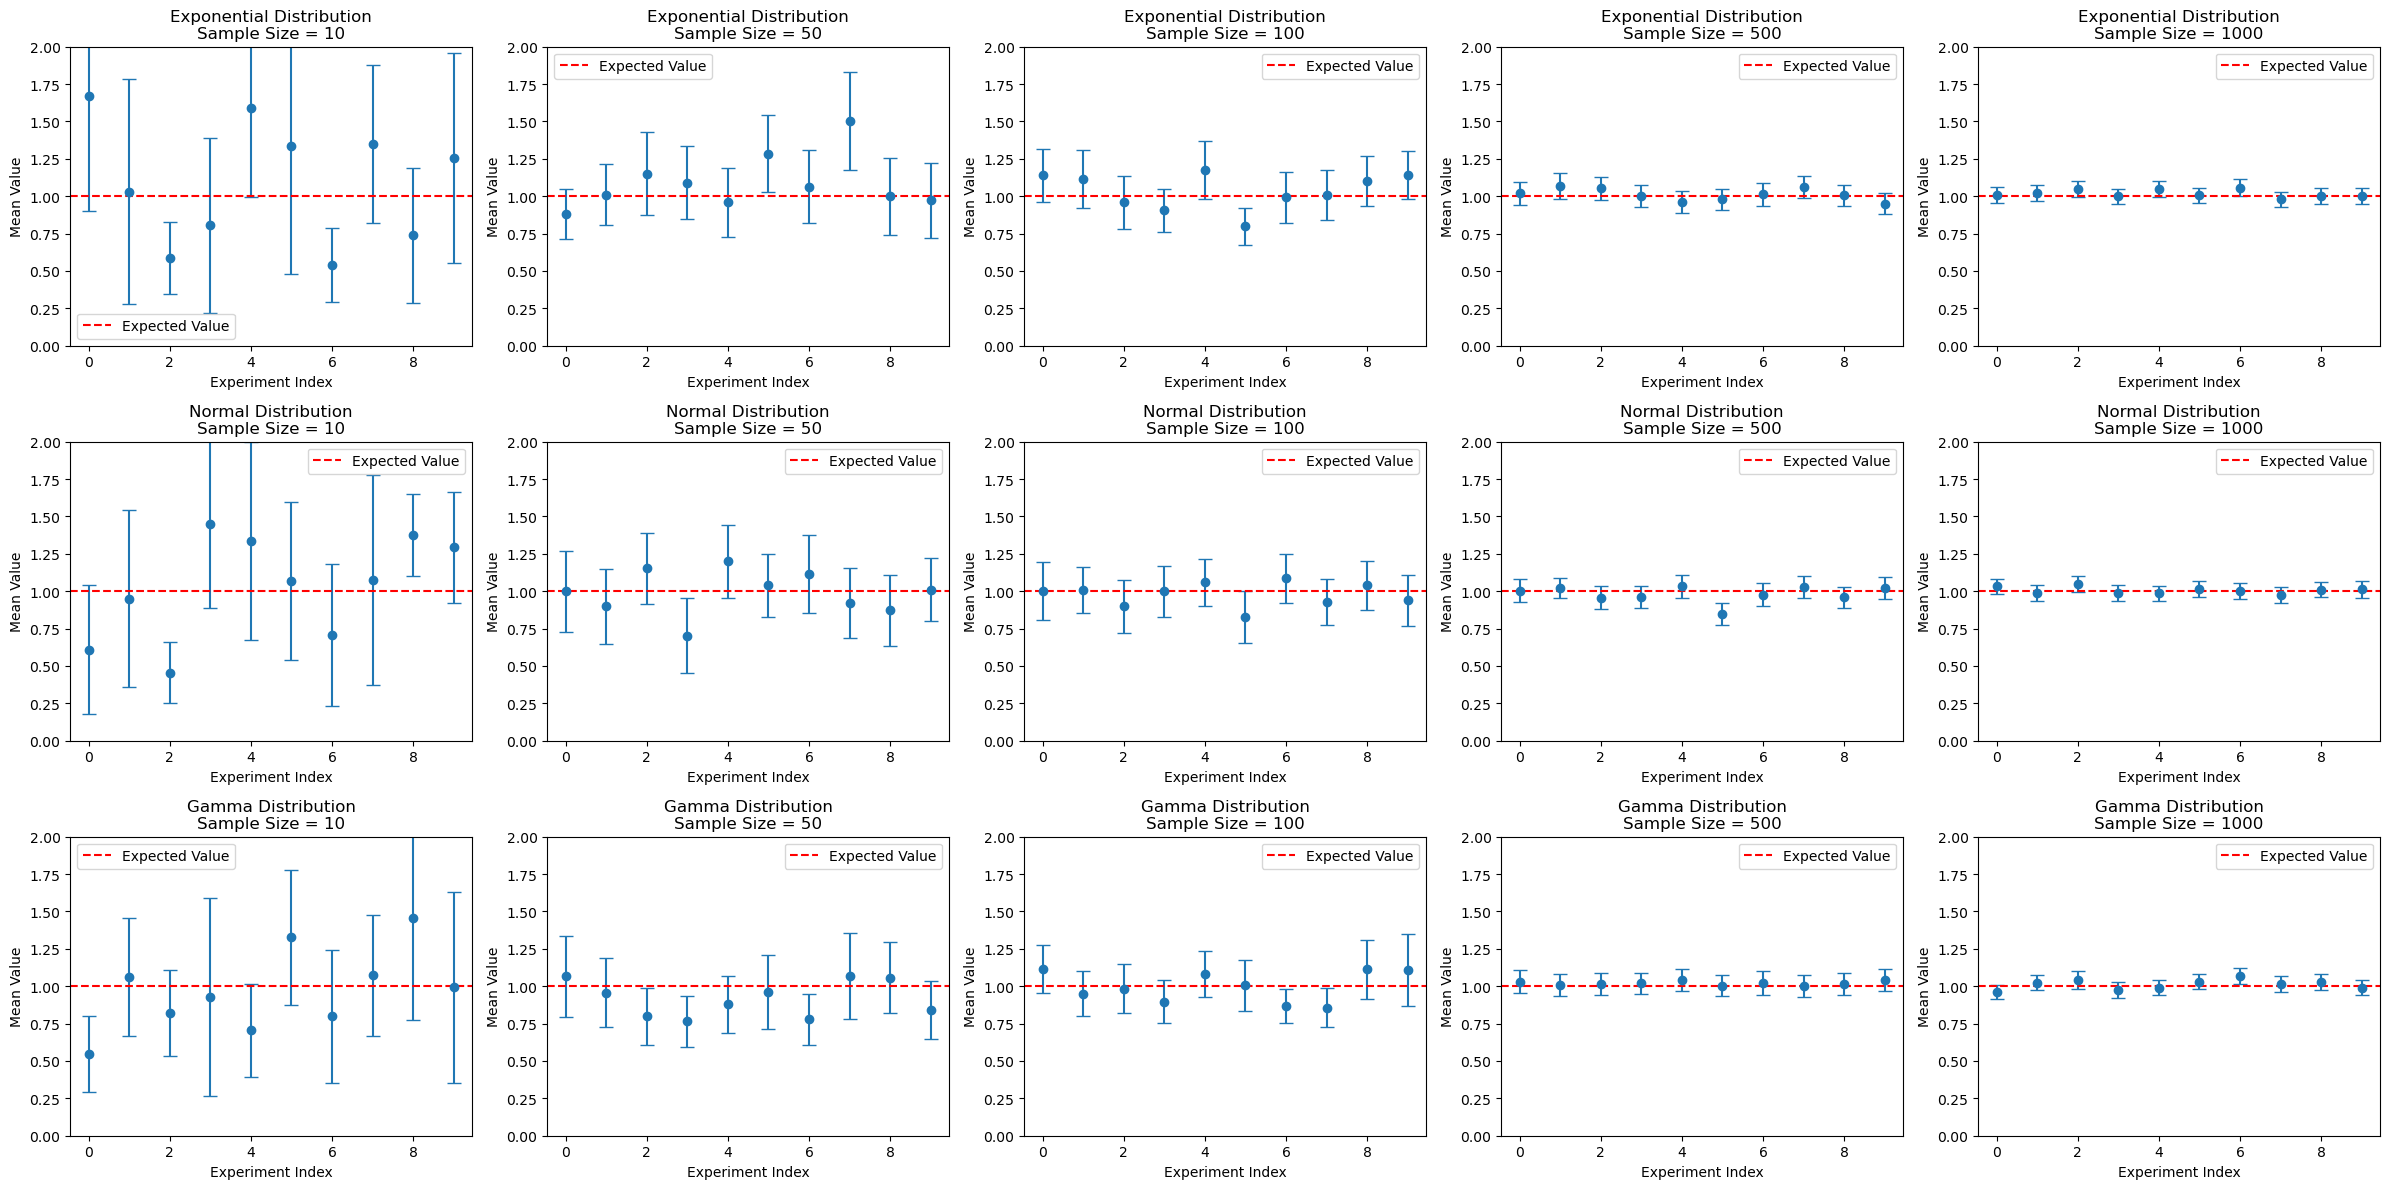

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, expon, norm, gamma

# Parameters for the distributions
sample_sizes = [10, 50, 100, 500, 1000]  # Different number of samples in each experiment
num_experiments = 10  # Same number of experiments for each case

# Parameters for each distribution ensuring expected value is 1
params = {
    'exponential': {'scale': 1},
    'normal': {'loc': 1, 'scale': 1},
    'gamma': {'a': 1, 'scale': 1}
}

# Function to generate data
def generate_data(dist, params, sample_size, num_experiments):
    if dist == 'exponential':
        return np.random.exponential(scale=params['scale'], size=(num_experiments, sample_size))
    elif dist == 'normal':
        return np.random.normal(loc=params['loc'], scale=params['scale'], size=(num_experiments, sample_size))
    elif dist == 'gamma':
        return np.random.gamma(shape=params['a'], scale=params['scale'], size=(num_experiments, sample_size))

# Function to calculate statistics
def calculate_statistics(data):
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1, ddof=1)
    return means, stds

# Function to calculate confidence intervals
def calculate_confidence_intervals(means, stds, sample_size, confidence_level=0.90):
    alpha = 1 - confidence_level
    t_crit = t.ppf(1 - alpha/2, df=sample_size-1)
    margin_of_error = t_crit * stds / np.sqrt(sample_size)
    lower_bound = means - margin_of_error
    upper_bound = means + margin_of_error
    return lower_bound, upper_bound

# Plot results
plt.figure(figsize=(24, 12))

distributions = ['exponential', 'normal', 'gamma']
for i, dist in enumerate(distributions):
    for j, sample_size in enumerate(sample_sizes):
        # Generate data
        data = generate_data(dist, params[dist], sample_size, num_experiments)
        # Calculate statistics
        means, stds = calculate_statistics(data)
        # Calculate confidence intervals
        lower_bound, upper_bound = calculate_confidence_intervals(means, stds, sample_size)

        # Plot mean and confidence intervals
        plt.subplot(len(distributions), len(sample_sizes), i * len(sample_sizes) + j + 1)
        plt.errorbar(range(num_experiments), means, yerr=[means - lower_bound, upper_bound - means], fmt='o', capsize=5)
        plt.axhline(1, color='r', linestyle='--', label='Expected Value')
        plt.title(f'{dist.capitalize()} Distribution\nSample Size = {sample_size}')
        plt.xlabel('Experiment Index')
        plt.ylabel('Mean Value')
        plt.ylim(0, 2)
        plt.legend()

plt.tight_layout()
plt.savefig('Chapter4_Statistics_Sample_Mean_6.png')
plt.show()


## Hypothesis testing for correlation

Sample size: 10
Average Pearson Correlation Coefficient: 0.459605906287231
95% Confidence Interval: (-0.2674084268989634, 0.8654231589232263)
Average (!!!!) t-statistic: 1.856141671190094
Average (!!!!) t_ref: 1.8595480375228421

Sample size: 20
Average Pearson Correlation Coefficient: 0.46172854887780146
95% Confidence Interval: (0.010889338207818521, 0.7592617078403676)
Average (!!!!) t-statistic: 2.361584257794271
Average (!!!!) t_ref: 1.734063606617535

Sample size: 50
Average Pearson Correlation Coefficient: 0.4898229964180971
95% Confidence Interval: (0.24302628905779555, 0.6777260166782989)
Average (!!!!) t-statistic: 4.02118852551107
Average (!!!!) t_ref: 1.6772241953450395

Sample size: 100
Average Pearson Correlation Coefficient: 0.49510281390346883
95% Confidence Interval: (0.3303741399622918, 0.6307716797607731)
Average (!!!!) t-statistic: 5.747120544409221
Average (!!!!) t_ref: 1.6605512170440568

Sample size: 200
Average Pearson Correlation Coefficient: 0.4923362736808038

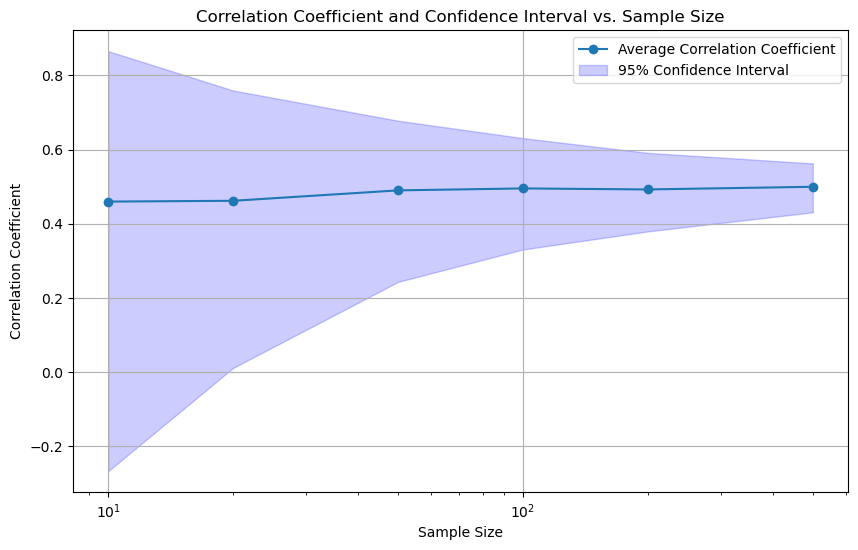

In [17]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to calculate the Pearson correlation coefficient
def custom_pearsonr(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    covariance = np.sum((x - mean_x) * (y - mean_y)) / n
    variance_x = np.sum((x - mean_x) ** 2) / n
    variance_y = np.sum((y - mean_y) ** 2) / n
    
    std_x = np.sqrt(variance_x)
    std_y = np.sqrt(variance_y)
    
    return covariance / (std_x * std_y)

# Function to calculate the confidence interval for the correlation coefficient using the Student's t-distribution
# This is applied in the case that hypothesis H0 was rejected
def confidence_interval_for_correlation(r, n, alpha=0.05):
    stderr = 1 / np.sqrt(n - 3)
    z = np.arctanh(r)
    z_crit = stats.t.ppf(1 - alpha / 2, df=n - 2)
    lo = z - z_crit * stderr
    hi = z + z_crit * stderr
    return np.tanh((lo, hi))

# Function to perform hypothesis test on the correlation coefficient
def hypothesis_test_for_correlation(r, n, alpha=0.05):
    t_stat = np.abs(r) * np.sqrt((n - 2) / (1 - r**2))
    # p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
    t_ref = stats.t.ppf(1 - alpha, df=n-2)
    return t_stat, t_ref

# Function to perform experiments and calculate correlation coefficients and confidence intervals
def perform_experiments(sample_sizes, num_experiments=100, alpha=0.05):
    results = []

    for n in sample_sizes:
        corrs = []
        ci_lows = []
        ci_highs = []
        t_stats = []
        t_refs = []
        for _ in range(num_experiments):
            x = np.random.normal(loc=0, scale=1, size=n)
            y = 0.5 * x + np.sqrt(1 - 0.5**2) * np.random.normal(loc=0, scale=1, size=n)
            corr_coef = custom_pearsonr(x, y)
            ci_low, ci_high = confidence_interval_for_correlation(corr_coef, n, alpha)
            t_stat, t_ref = hypothesis_test_for_correlation(corr_coef, n, alpha)
            corrs.append(corr_coef)
            ci_lows.append(ci_low)
            ci_highs.append(ci_high)
            t_stats.append(t_stat)
            t_refs.append(t_ref)
        
        avg_corr = np.mean(corrs)
        avg_ci_low = np.mean(ci_lows)
        avg_ci_high = np.mean(ci_highs)
        avg_t_stat = np.mean(t_stats)
        avg_t_ref = np.mean(t_refs)
        results.append((n, avg_corr, avg_ci_low, avg_ci_high, avg_t_stat, avg_t_ref))
    
    return results

# Define sample sizes and perform experiments
sample_sizes = [10, 20, 50, 100, 200, 500]
results = perform_experiments(sample_sizes)

# Print the results
for n, avg_corr, avg_ci_low, avg_ci_high, avg_t_stat, avg_t_ref in results:
    print(f"Sample size: {n}")
    print(f"Average Pearson Correlation Coefficient: {avg_corr}")
    print(f"95% Confidence Interval: ({avg_ci_low}, {avg_ci_high})")
    print(f"Average (!!!!) t-statistic: {avg_t_stat}")
    print(f"Average (!!!!) t_ref: {avg_t_ref}")
    print()

# Plot the results
sample_sizes = [result[0] for result in results]
avg_corrs = [result[1] for result in results]
ci_lows = [result[2] for result in results]
ci_highs = [result[3] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, avg_corrs, marker='o', label='Average Correlation Coefficient')
plt.fill_between(sample_sizes, ci_lows, ci_highs, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xscale('log')
plt.xlabel('Sample Size')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient and Confidence Interval vs. Sample Size')
plt.legend()
plt.grid(True)
plt.savefig("Chapter4_Correlation_Confidence.png")
plt.show()


## Example for correlation
This is an example for correlated random processes based on the example given on https://github.com/Apress/numerical-python-second-ed/blob/master/ch12-code-listing.ipynb

In [5]:
# import the very basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Turn off warnings about deprectaed functions (we wont change the setup anyway)
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read the data files as CSV
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"]);
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"]);

# Convert time axis and assign it as index
df1.time = (pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'));
df1 = df1.set_index("time");
df2.time = (pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'));
df2 = df2.set_index("time")

Plot the whole time series first

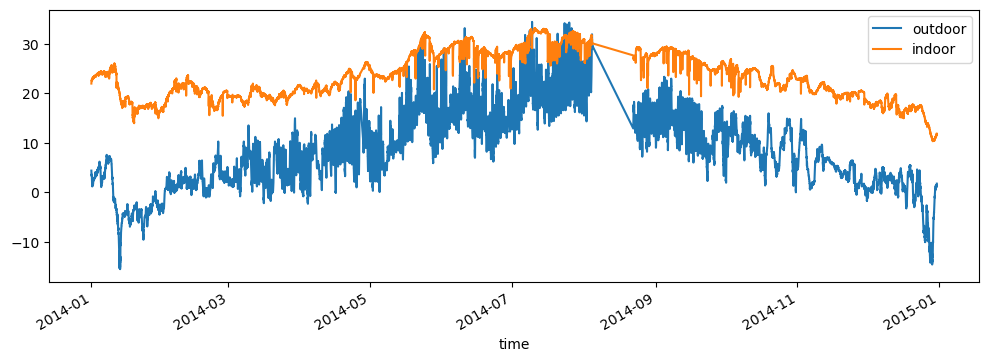

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4));
df1.plot(ax=ax);
df2.plot(ax=ax);
# plt.savefig("Chapter2_Correlation_Fig1.png")

Plot different average values over time

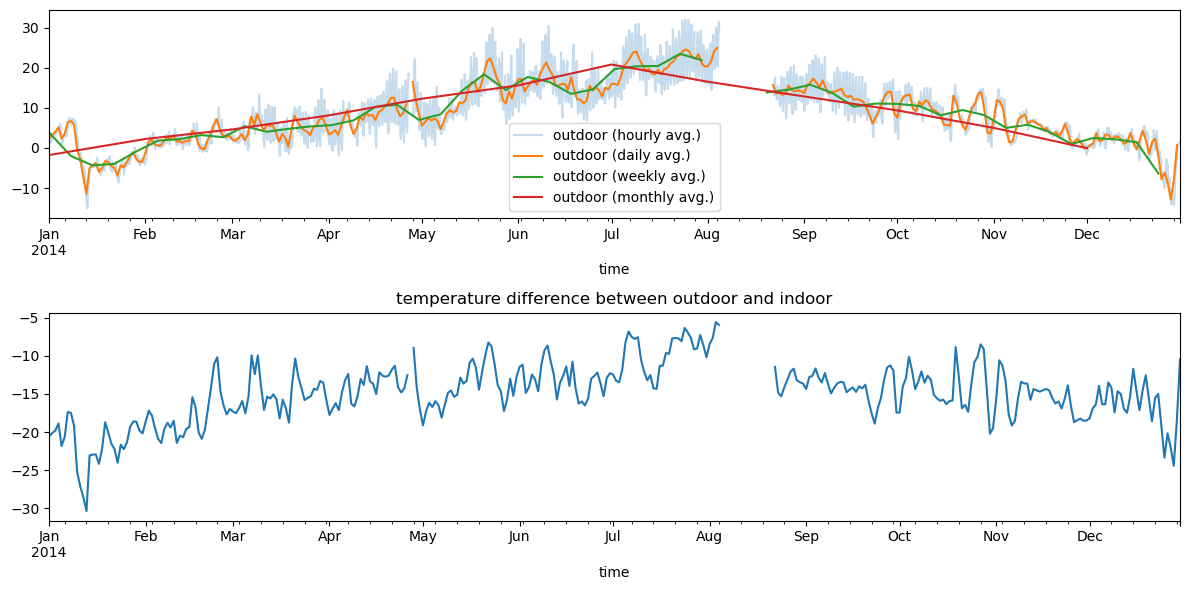

In [9]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]
df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")
fig.tight_layout()
# plt.savefig("Chapter2_Correlation_Fig2.png")

Plot the correlation of both time series

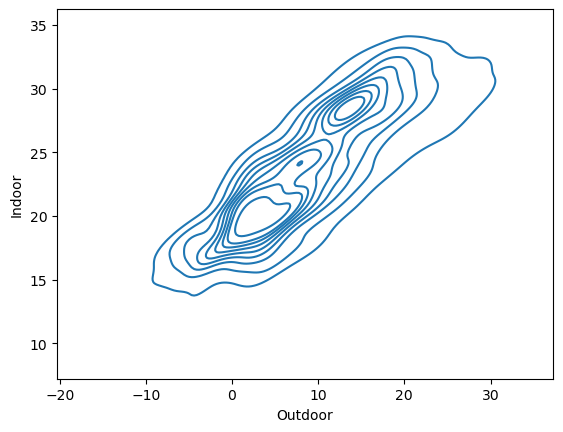

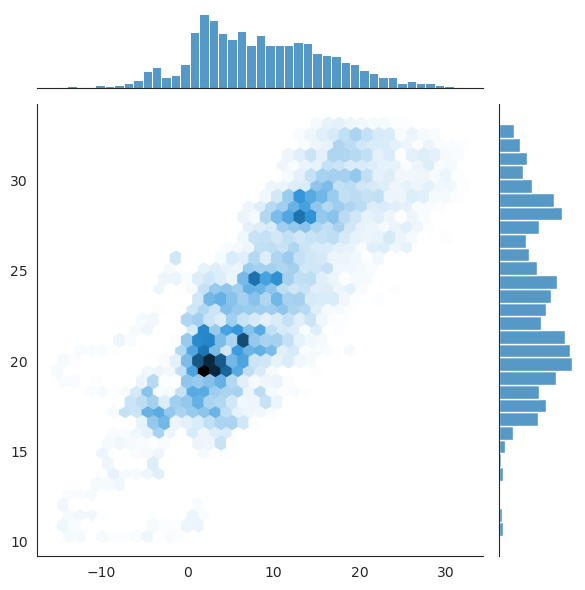

In [10]:
df_temp = pd.concat([df1, df2], axis=1)
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

ax = sns.kdeplot(x = df_temp.resample("H").mean()["outdoor"].dropna().values,
            y = df_temp.resample("H").mean()["indoor"].dropna().values, fill=False);
ax.set_xlabel("Outdoor");
ax.set_ylabel("Indoor");
# ax.get_figure().savefig("Chapter2_Contour_Joint_Distribution.png")

with sns.axes_style("white"):
    ax = sns.jointplot(x = df_temp.resample("H").mean()["outdoor"].values, y = df_temp.resample("H").mean()["indoor"].values, kind="hex");
    # ax.savefig("Chapter2_Contour_Histo_Joint_Distribution.png")

Determine correlation coefficient

In [11]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
stats.pearsonr(df["outdoor"], df["indoor"])

PearsonRResult(statistic=0.8375494303870423, pvalue=0.0)

****
The following example is taken for Statisches Bundesamt, https://regionalatlas.statistikportal.de/#
Exemplary data sets are used for different German communities
****

In [17]:
df1 = pd.read_csv('Average age.csv', delimiter=";", names=["key", "community_age", "age"]);
df1.set_index("key");
df2 = pd.read_csv('Available income.csv', delimiter=";", names=["key", "community_income", "income"]);
df2.set_index("key");
df3 = pd.read_csv('Employment rate.csv', delimiter=";", names=["key", "community_employment", "employment"]);
df3.set_index("key");
df4 = pd.read_csv('Wanderung.csv', delimiter=";", names=["key", "community_movement", "movement"]);
df4.set_index("key");

In [18]:
df_temp = df1.merge(df2, left_on='key', right_on='key').merge(df3, left_on='key', right_on='key').merge(df4, left_on='key', right_on='key')

PearsonRResult(statistic=-0.541141987710607, pvalue=8.327300865301295e-32)
PearsonRResult(statistic=0.2881780398630215, pvalue=4.344233055615695e-09)
PearsonRResult(statistic=-0.261060691227499, pvalue=1.1771607545516088e-07)


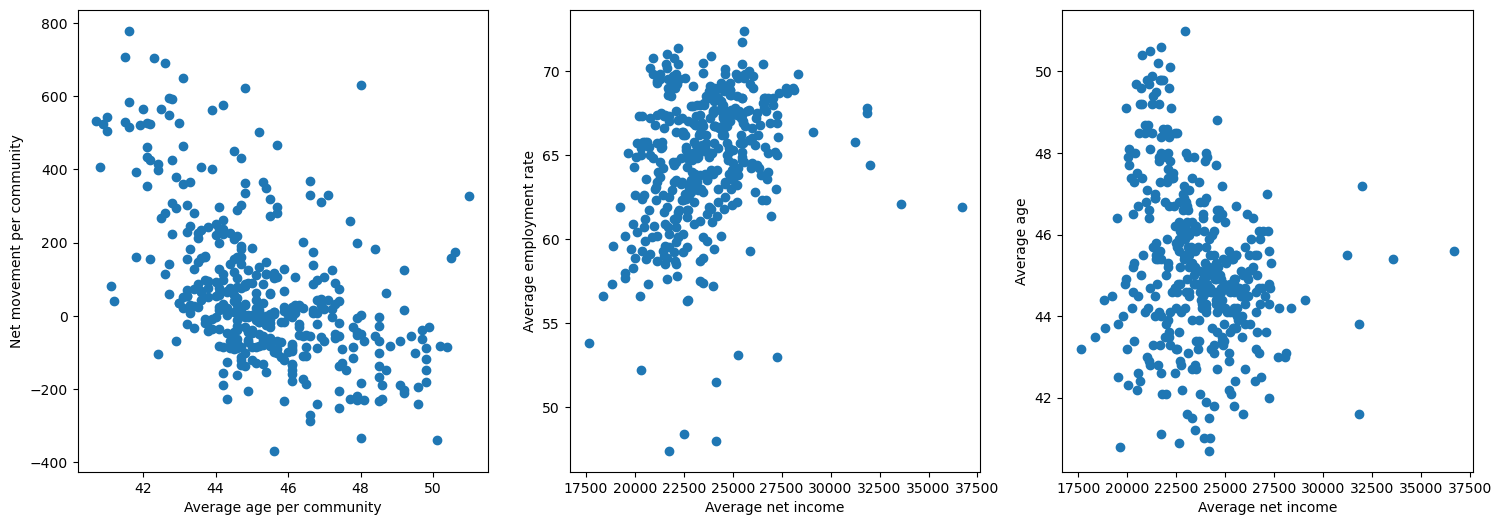

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 6))
ax[0].scatter(df_temp.age, df_temp.movement)
ax[0].set_xlabel("Average age per community")
ax[0].set_ylabel("Net movement per community")
print(stats.pearsonr(df_temp.age, df_temp.movement))

ax[1].scatter(df_temp.income, df_temp.employment)
ax[1].set_xlabel("Average net income")
ax[1].set_ylabel("Average employment rate")
print(stats.pearsonr(df_temp.income, df_temp.employment))

ax[2].scatter(df_temp.income, df_temp.age)
ax[2].set_xlabel("Average net income")
ax[2].set_ylabel("Average age")
print(stats.pearsonr(df_temp.income, df_temp.age))

# fig.savefig("Chaper2_Scatter-Plot-German-Population.png")

Text(0.5, 0, 'Age')

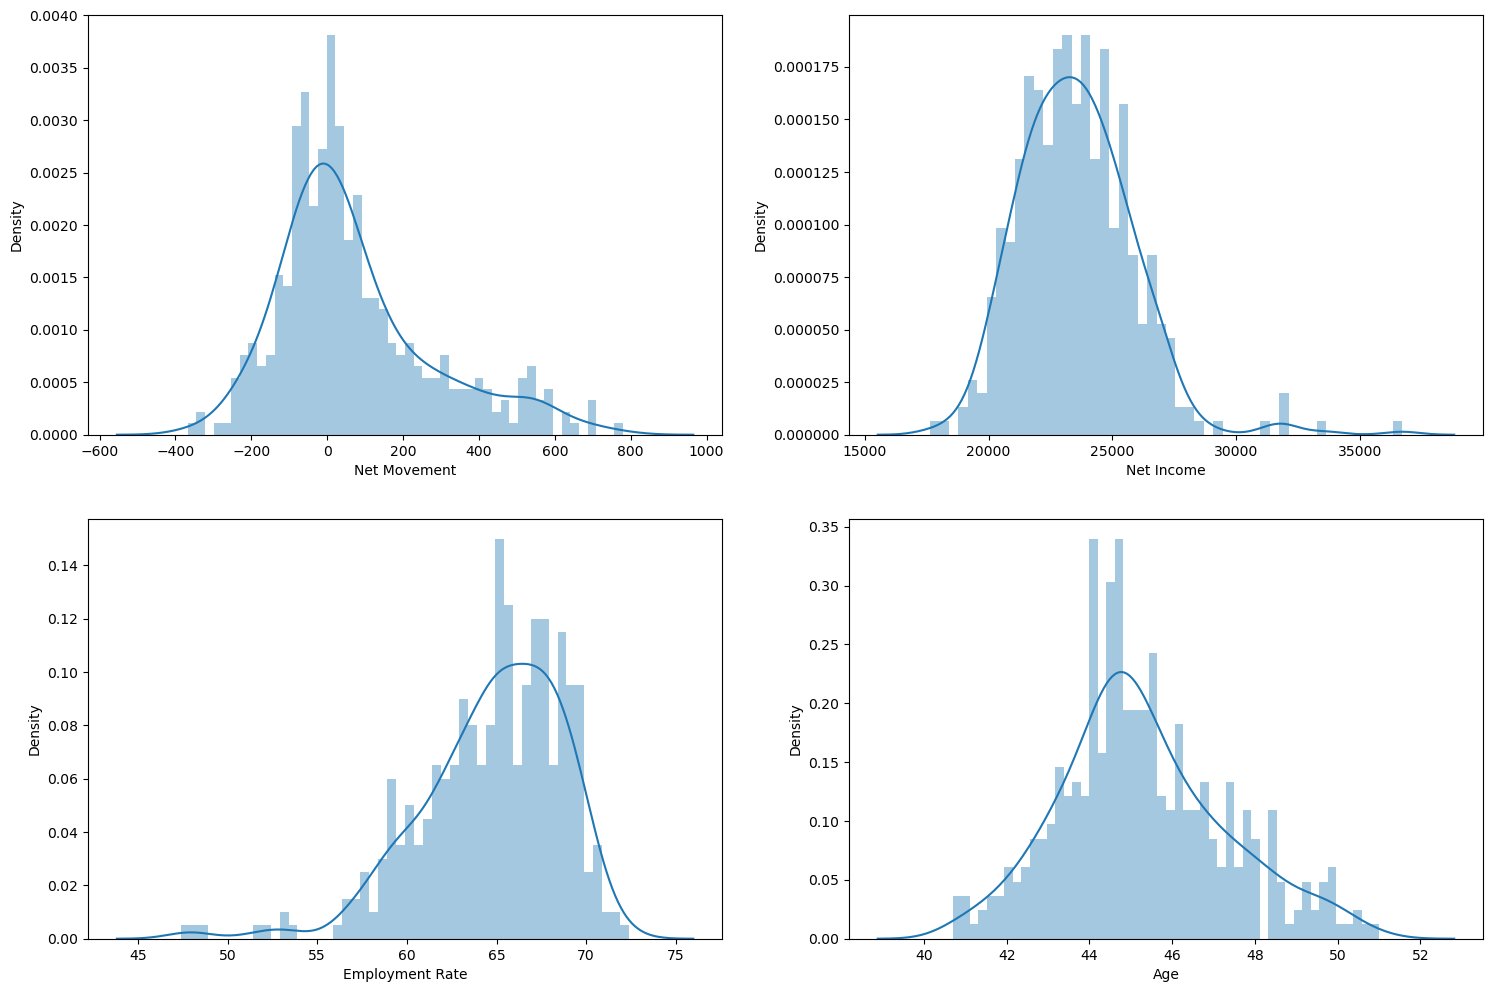

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(18, 12))
sns.distplot(df_temp.movement.values, bins=50, ax = ax[0, 0]);
ax[0, 0].set_xlabel("Net Movement")
sns.distplot(df_temp.income.values, bins=50, ax = ax[0, 1]);
ax[0, 1].set_xlabel("Net Income")
sns.distplot(df_temp.employment.values, bins=50, ax = ax[1, 0]);
ax[1, 0].set_xlabel("Employment Rate")
sns.distplot(df_temp.age.values, bins=50, ax = ax[1, 1]);
ax[1, 1].set_xlabel("Age")
# fig.savefig("Chaper2_Fitted-Histogram-German-Population.png")

In [21]:
#fig, ax = plt.subplots(figsize=(18, 12))
#sns.distplot(df_temp.income.values, bins=50, ax = ax);
#ax.set_xlabel("Income")
#fig.savefig("Chaper2_Fitted-Histogram-Incom-German-Population.png")
print("Average income: " + str(round(df_temp.income.mean(), 2)))
print("Standard deviation: " + str(round(df_temp.income.std(), 2)))

Average income: 23544.51
Standard deviation: 2329.92
